In [26]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import random as rd
from sklearn.cluster import KMeans 

## La classe Point

In [27]:
class Point: #définition de la classe point
    """Classé définissant un point caractérisée par : 
    - ses coordonnées 
    - sa couleur"""
        
    def __init__(self):
        self.coords = [rd.uniform(0,10),rd.uniform(0,10)]
        self.x = self.coords[0]
        self.y = self.coords[1]
        self.color = (rd.random(),rd.random(),rd.random())
        
    def coord(self,x,y):
        """Méthode permettant de générer des coordonées soi même"""
        self.x = x
        self.y = y
        
    

## Test avec scikit-learn

In [71]:
L = [] #liste de points
X = []
Y = []
colors = []
for i in range(30): 
    p = Point()
    L.append(p)
    X.append(p.x)
    Y.append(p.y)
    colors.append(p.color)

In [72]:
#création du dataframe sur lequel on va travailler 
df = pd.DataFrame({'x': X, 'y': Y})
df

,x,y
0,4.633619,6.815040
1,3.503822,6.899725
2,2.640232,5.099126
3,6.604861,4.376654
4,4.083465,3.961526
5,7.910665,8.349040
6,6.833445,9.105420
7,9.967700,6.596808
8,9.014106,5.078337
9,6.153853,4.866186


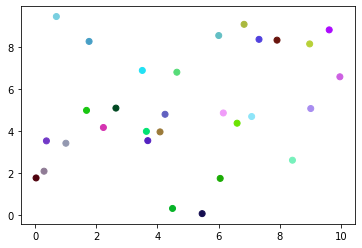

In [73]:
#création du nuages de points 
plt.scatter(X,Y,c=colors)
plt.show()

Ici, nous allons tester KMeans sans l'avoir implémenter précédemment en utilisant scikit-learn

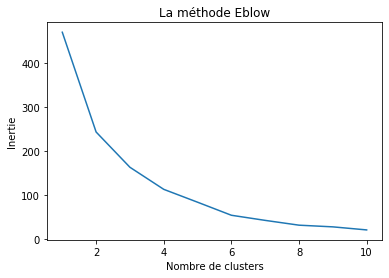

In [74]:
#on suppose que le nombre de clusters n'est pas connu 
tab = []
for i in range(1,11):#on va chercher quel nombre de clusters est optimal 
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    tab.append(kmeans.inertia_)#liste contenant l'inertie intraclasse selon le nombre de clusters
plt.plot(range(1,11),tab)
plt.title("La méthode Eblow")
plt.ylabel("Inertie")
plt.xlabel("Nombre de clusters")
plt.show()

On doit observer quand est-ce que l'inertie a une baisse assez conséquente. Puisque que les données sont générées aléatoirement l'inertie entre les clusters sera quand même assez élevé sauf si l'on décide de choisir un grand nombre de clusters et ce n'est pas ce que l'on cherche.

### /!\ Il faut changer le nombre de clusters selon ce que l'on a choisi en changeant la variable cluster 

In [82]:
cluster = 6 
kmeans = KMeans(n_clusters=cluster)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

On va maintenant visualiser ce que donne la classification par l'algorithme KMeans 

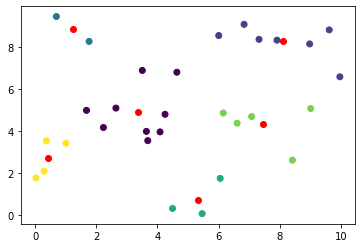

In [76]:
plt.scatter(X,Y,c=kmeans.predict(df)) #les différents clusters selon les 
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='r')
plt.show()

In [77]:
prediction = kmeans.predict(df)
prediction

array([0, 0, 0, 4, 0, 1, 1, 1, 4, 4, 3, 5, 5, 1, 0, 0, 4, 0, 2, 2, 1, 0,
       1, 5, 4, 3, 0, 5, 3, 1])

In [78]:
inertie = kmeans.inertia_
inertie 

53.73817715146561

## Implémentation de l'algorithme KMeans 

In [79]:
class kmean:
    
    def __init__(self, n_clusters=2):
        self.K = n_clusters
        
    def fit1(self, X):
        """
        On itère tant que les labels ne changent pas d'une itération à une autre.
        """
        self.centroids = np.array(X.iloc[np.random.choice(len(X), self.K, replace=False)])
        self.initial_centroids = self.centroids
        self.prev_label,  self.labels = None, np.zeros(len(X))
        while not np.all(self.labels == self.prev_label) :
            self.prev_label = self.labels
            self.labels = self.predict(X)
            self.update_centroid(X)
        return self
    
    def fit2(self, X):
        """
        On fait un nombre fixe d'itérations. Ici 10, mais pourrait être passé en paramètre.
        """
        self.centroids = np.array(X.iloc[np.random.choice(len(X), self.K, replace=False)])
        self.initial_centroids = self.centroids
        self.prev_label,  self.labels = None, np.zeros(len(X))
        for iter in range(50):
            self.prev_label = self.labels
            self.labels = self.predict(X)
            self.update_centroid(X)
        return self
        
    def predict(self, X):
        return np.apply_along_axis(self.compute_label, 1, X)

    def compute_label(self, x):
        return self.euclidian_dist(x).argmin()
    
    def euclidian_dist(self, x):
        return np.sqrt(np.sum((x - self.centroids)**2, axis=1))

    def update_centroid(self, X):
        self.centroids = np.array([np.mean(X[self.labels == k], axis=0)  for k in range(self.K)])

In [83]:
model = kmean(6)
model.fit1(df)
pred = model.labels
pred

array([2, 2, 4, 5, 4, 3, 3, 5, 5, 5, 1, 4, 4, 3, 4, 4, 5, 4, 2, 2, 3, 4,
       3, 4, 5, 0, 4, 4, 1, 3], dtype=int64)

Comparons les deux modèles entre eux

([<matplotlib.patches.Wedge at 0x1a655ef1548>,
 [Text(1.0461621663333946, 0.3399186987098808, 'identiques'),
  Text(-1.0461621902025062, -0.33991862524830146, 'différents')])

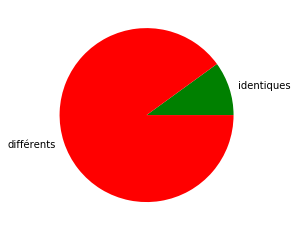

In [84]:
l = 0
for i in range(20):
    if prediction[i]==pred[i]:
        l+=1
wins = l/20.
plt.pie([wins, 1-wins],labels=['identiques','différents'],colors=['g','r'])